In [17]:
import cv2
import matplotlib.pyplot as plt

In [18]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [19]:
model =cv2.dnn_DetectionModel(frozen_model, config_file)

In [20]:
classLabels = []
file_name =  'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [21]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [22]:
print(len(classLabels))

80


In [23]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7acf90e45f70>

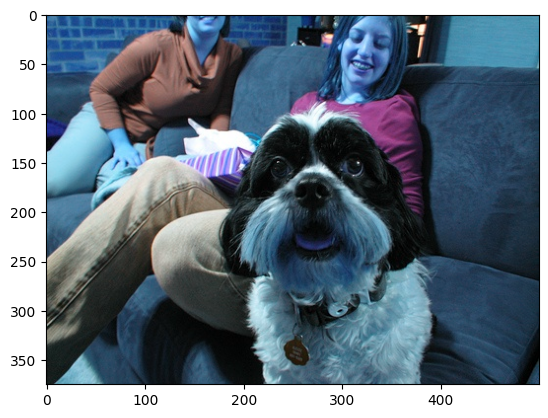

In [24]:
image = cv2.imread('001150.jpg')
plt.imshow(image)

In [25]:
ClassIndex, confidence, bbox = model.detect(image, confThreshold=0.5)

In [26]:
print(ClassIndex)

[18 63  1  1]


In [27]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN  # Corrected the font constant name

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):

    cv2.rectangle(image, boxes, (255,0,0),2)

    cv2.putText(image, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=1)


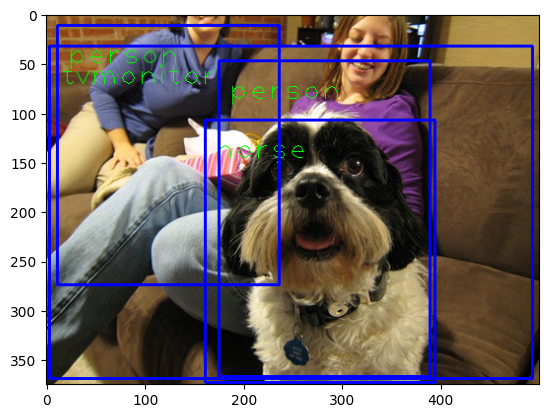

In [28]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))